<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from google.colab import files
import io
data = files.upload()

Saving data_final.csv to data_final (1).csv


In [36]:
df = pd.read_csv('result2.csv')

In [37]:
train=df.sample(frac=0.8)
test=df.sample(frac=0.2)

In [64]:
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

In [65]:
train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
y_train = train_data_set[:, -1].astype(float)

In [67]:
test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
y_test = test_data_set[:, -1].astype(float)

In [68]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

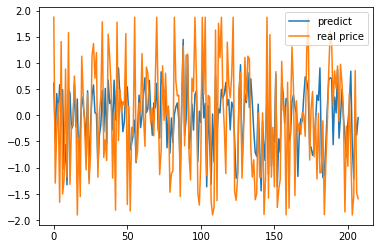

In [69]:
plt.plot(mlr.predict(x_test), label="predict")
y_t=y_test.reshape(-1,1)
plt.plot(y_test, label="real price")
plt.legend()

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 11, activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

In [71]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

In [72]:
hist=model.fit(x_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
26/26 [==============================] - 1s 9ms/step - loss: 0.6866 - mae: 0.6711
Epoch 2/1000
26/26 [==============================] - 0s 9ms/step - loss: 0.5889 - mae: 0.6099
Epoch 3/1000
26/26 [==============================] - 0s 9ms/step - loss: 0.5521 - mae: 0.5901
Epoch 4/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.5771 - mae: 0.5993
Epoch 5/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.5180 - mae: 0.5609
Epoch 6/1000
26/26 [==============================] - 0s 9ms/step - loss: 0.5400 - mae: 0.5760
Epoch 7/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.5007 - mae: 0.5595
Epoch 8/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4982 - mae: 0.5529
Epoch 9/1000
26/26 [==============================] - 0s 9ms/step - loss: 0.4764 - mae: 0.5417
Epoch 10/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.5015 - mae: 0.5537
Epoch 11/1000
26/26 [===========================

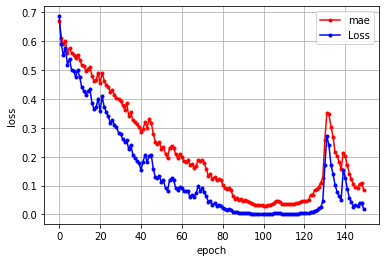

In [81]:
y_acc = hist.history['mae']
y_loss = hist.history['loss']#x_len = np.arange(len(y_loss)) 
x_len = np.arange(150)
plt.plot(x_len, y_acc[:150], marker='.', c='red', label="mae")
plt.plot(x_len, y_loss[:150], marker='.', c='blue', label="Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [74]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[0.686553418636322, 0.5889232754707336, 0.5521196722984314, 0.5770977139472961, 0.5180478692054749, 0.5399501323699951, 0.5006670355796814, 0.49824637174606323, 0.4764464497566223, 0.5014950037002563, 0.4747036397457123, 0.44052889943122864, 0.42788147926330566, 0.4141925573348999, 0.4272931218147278, 0.4328968822956085, 0.3845404088497162, 0.36572331190109253, 0.3707670271396637, 0.4015805423259735, 0.3594540059566498, 0.4088284373283386, 0.37232136726379395, 0.3561542332172394, 0.33975815773010254, 0.3161105513572693, 0.3270776867866516, 0.3101389408111572, 0.3013194799423218, 0.28359636664390564, 0.2793525457382202, 0.2606375515460968, 0.2524382770061493, 0.2562783360481262, 0.22603502869606018, 0.24191632866859436, 0.2074199765920639, 0.19611595571041107, 0.18649999797344208, 0.1768922507762909, 0.15501222014427185, 0.1827320158481598, 0.2064482867717743, 0.1829865276813507, 0.2034239023923874, 0.2076183408498764, 0.15803022682666779, 0.1291101723909378,

In [76]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 3ms/step - loss: 0.2998 - mae: 0.1903
## evaluation loss and_metrics ##
[0.2997596859931946, 0.19032937288284302]


In [79]:
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)
print(y_test[0:1])

## yhat ##
[[-1.4838421]]
[1.87145562]
